# Introduction aux données

In [111]:
import pandas as pd
pd.options.mode.chained_assignment = None

columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
           'model year', 'origin', 'car name']

cars = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=columns)

filtered_cars = cars[cars['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

filtered_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Fonction pour entrainer le modèle et calculer biais et variance

In [112]:
import numpy as np
from sklearn.linear_model import LinearRegression

def train_and_test(cols):
    model = LinearRegression()
    model.fit(filtered_cars[cols], filtered_cars['mpg'])
    predicted_values = model.predict(filtered_cars[cols])
    variance = np.var(predicted_values)
    mse = (filtered_cars['mpg'] - predicted_values)**2
    mse = mse.mean()
    return(mse,variance)

cyl_mse, cyl_var = train_and_test(['cylinders']) 

weight_mse, weight_var =  train_and_test(['weight']) 
    
    

In [113]:
print(cyl_mse)
print(cyl_var)
print(weight_mse)
print(weight_var)

24.02017956815553
36.74255887416017
18.6766165974193
42.08612184489641


# Modèles multivariés

In [114]:
one_mse, one_var = train_and_test(['cylinders']) 
print(one_mse, one_var)
two_mse, two_var = train_and_test(['cylinders','displacement'])
print(two_mse, two_var)
three_mse, three_var = train_and_test(['cylinders','displacement', 'horsepower'])
print(three_mse, three_var)
four_mse, four_var = train_and_test(['cylinders','displacement','horsepower','weight'])
print(four_mse, four_var)
five_mse, five_var = train_and_test(['cylinders','displacement','horsepower','weight','acceleration'])
print(five_mse, five_var)
six_mse, six_var = train_and_test(['cylinders','displacement','horsepower','weight','acceleration','model year'])
print(six_mse, six_var)
seven_mse, seven_var = train_and_test(['cylinders','displacement','horsepower','weight','acceleration','model year','origin'])
print(seven_mse, seven_var)

24.02017956815553 36.74255887416017
21.282057055586364 39.480681386729316
20.25295483971423 40.509783602601445
17.76386057184384 42.99887787047185
17.76139610540621 43.001342336909396
11.59017098141523 49.172567460900346
10.847480945000452 49.915257497315146


# Validation croisée

In [115]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error 

def train_and_cross_val(cols):
    mse_values = []
    var_values = []

    model = LinearRegression()
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    
    for train_index,test_index in kf.split(filtered_cars):
        model.fit(filtered_cars.iloc[train_index][cols], filtered_cars.iloc[train_index]['mpg'])
        predictions = model.predict(filtered_cars.iloc[test_index][cols])
        mse = mean_squared_error(predictions, filtered_cars.iloc[test_index]['mpg'])
        mse_values.append(mse)
        variance = np.var(predictions)
        var_values.append(variance)
    
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(var_values)
        
    return(avg_mse, avg_var)


In [116]:
two_mse, two_var = train_and_cross_val(['cylinders','displacement'])
print(two_mse, two_var)
three_mse, three_var = train_and_cross_val(['cylinders','displacement', 'horsepower'])
print(three_mse, three_var)
four_mse, four_var = train_and_cross_val(['cylinders','displacement','horsepower','weight'])
print(four_mse, four_var)
five_mse, five_var = train_and_cross_val(['cylinders','displacement','horsepower','weight','acceleration'])
print(five_mse, five_var)
six_mse, six_var = train_and_cross_val(['cylinders','displacement','horsepower','weight','acceleration','model year'])
print(six_mse, six_var)
seven_mse, seven_var = train_and_cross_val(['cylinders','displacement','horsepower','weight','acceleration','model year','origin'])
print(seven_mse, seven_var)

21.584370274954374 38.902525313756016
20.655622193882955 40.091287956606934
18.169683239081884 42.50764364364439
18.283038517172052 42.59873630014678
12.099685425467118 48.92824696771803
11.418131971812054 49.90431373098729


# Graphique compromis erreur quadratique moyenne/variance

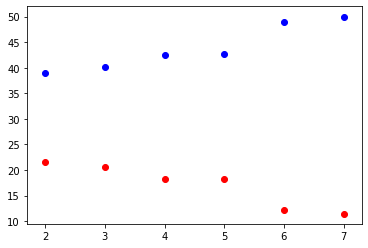

In [100]:
import matplotlib.pyplot as plt

x_cara = [2,3,4,5,6,7]
y_mse = [two_mse,three_mse,four_mse,five_mse,six_mse,seven_mse]
y_var = [two_var,three_var,four_var,five_var,six_var,seven_var]


plt.scatter(x_cara, y_mse,c='red')
plt.scatter(x_cara, y_var,c='blue')
